In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

import seaborn as sns

In [74]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('breast-cancer-data.csv')
print(data.shape)

(569, 9)


In [5]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,symmetry_mean
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.2419
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.1812
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.2069
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2597
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1809


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                569 non-null    int64  
 1   diagnosis         569 non-null    object 
 2   radius_mean       569 non-null    float64
 3   texture_mean      569 non-null    float64
 4   perimeter_mean    569 non-null    float64
 5   area_mean         569 non-null    float64
 6   smoothness_mean   569 non-null    float64
 7   compactness_mean  569 non-null    float64
 8   symmetry_mean     569 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 40.1+ KB


In [14]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,symmetry_mean
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.181162
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.027414
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.106000
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.161900
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.179200
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.195700
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.304000


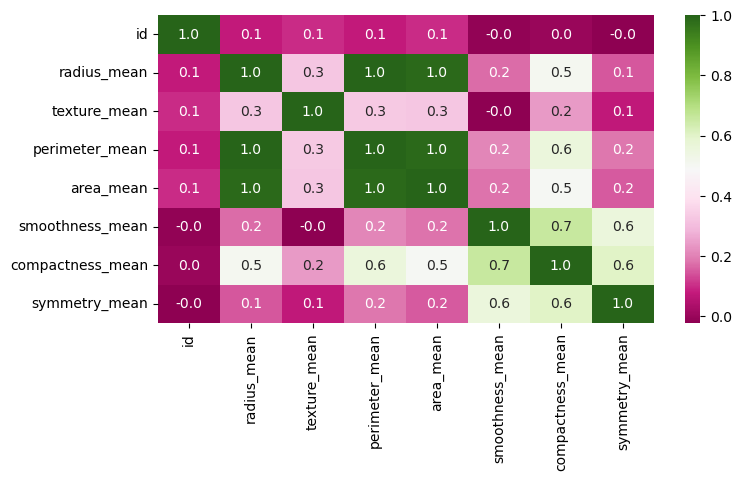

In [38]:
cols = data.drop('diagnosis',axis=1).columns
corr = data[cols]
plt.figure(figsize=(8,4))
sns.heatmap(data.corr(),xticklabels=corr.columns, yticklabels=corr.columns, annot=True,cmap='PiYG',fmt='.1f')
plt.show()

In [39]:
data.drop('id',axis=1, inplace=True)

In [40]:
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'symmetry_mean'],
      dtype='object')

In [41]:
data.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [42]:
data.diagnosis = data.diagnosis.map({'M':1, 'B':0})

In [43]:
data.diagnosis.value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

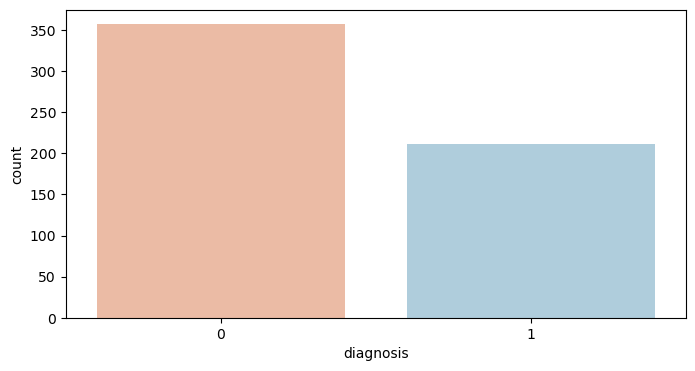

In [48]:
plt.figure(figsize=(8,4))
sns.countplot(x=data['diagnosis'], palette='RdBu')
plt.show()

In [49]:
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'symmetry_mean'],
      dtype='object')

In [50]:
# preparing only the vars which are going to be trained for predictions
# ignoring diagnosis as it is id
# ignoring radius_mean and perimeter_mean 

prediction_vars = ['texture_mean','perimeter_mean','smoothness_mean','compactness_mean','symmetry_mean']


In [59]:
train,test = train_test_split(data,test_size=0.3)

In [60]:
X_train = train[prediction_vars]
X_test = test[prediction_vars]

Y_train =train.diagnosis
Y_test = test.diagnosis

In [61]:
model = LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

In [62]:
model.coef_

array([[0.20270317, 0.16278027, 0.52625944, 1.48460491, 0.8208795 ]])

In [63]:
model.intercept_

array([-19.93167118])

In [65]:
predictions = model.predict(X_test)

In [80]:
X_test['Actual']=Y_test
X_test['Prediction']=predictions
df_new = X_test
df_new

,texture_mean,perimeter_mean,smoothness_mean,compactness_mean,symmetry_mean,Actual,Prediction
126,24.69,87.76,0.09258,0.07862,0.1761,1,0
383,17.48,80.64,0.10420,0.12970,0.1779,0,0
32,23.98,112.80,0.11970,0.14960,0.2248,1,1
157,19.46,108.40,0.07445,0.07223,0.1844,0,1
548,19.34,61.05,0.08491,0.05030,0.1580,0,0
...,...,...,...,...,...,...,...
181,26.57,142.70,0.11410,0.28320,0.2395,1,1
462,26.99,92.25,0.06995,0.05223,0.1707,0,1
429,17.67,80.98,0.07896,0.04522,0.1459,0,0
86,21.46,94.25,0.09444,0.09947,0.2075,1,1


In [81]:
metrics.accuracy_score(Y_test,predictions)

0.9064327485380117

In [82]:
metrics.confusion_matrix(Y_test,predictions)

array([[96,  7],
       [ 9, 59]], dtype=int64)

In [83]:
df_new.to_csv('actual_predicted_cancer.csv')

In [84]:
model.predict([[21.46, 94.25, 0.09444, 0.09947, 0.2075]])

array([1], dtype=int64)

In [85]:
model.predict([[26.99, 92.25, 0.06995, 0.05223, 0.1707]])

array([1], dtype=int64)